<a href="https://colab.research.google.com/github/mleyvaz/computacion-paralela/blob/main/Numba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perfilado s de memoria
El acto de comprobar sistemáticamente el rendimiento en diferentes condiciones se denomina benchmarking.
Analizar qué partes de un programa contribuyen al rendimiento total e identificar posibles cuellos de botella es la elaboración de perfiles.
Utilizaremos el paquete memory_profiler para hacer un seguimiento del uso de la memoria. Se puede instalar ejecutando el código siguiente en la consola:
# Numba

Numba facilita la creación de funciones aceleradas. Puedes utilizarlo con el decorador numba.jit.


In [ ]:
pip install memory_profiler

In [ ]:
import numpy as np
import dask.array as da
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import numba

In [ ]:
# Numpy
def sum_with_numpy():
    # Serial implementation
    np.arange(10**7).sum()
# Dask
def sum_with_dask():
    # Parallel implementation
    work = da.arange(10**7).sum()
    work.compute()
# Numba 

@jit
def sum_with_numba():
    """Compute the sum of the numbers in the range [0, a)."""
    x = 0
    for i in range(10**7):
        x += i
    return x

In [ ]:
timeDask = %timeit -o  sum_with_dask()
time = %timeit -o  sum_with_numpy()

print(f"Tiempo Dask: {timeDask.best}s")

print(f"Tiempo numpy: {time.best:.4f}s")


10 loops, best of 5: 23 ms per loop
10 loops, best of 5: 19.6 ms per loop
The slowest run took 485723.11 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 108 ns per loop
Tiempo Dask: 0.023017832599998657s
Tiempo numpy: 0.0196s
Tiempo numpy: 0.0000s


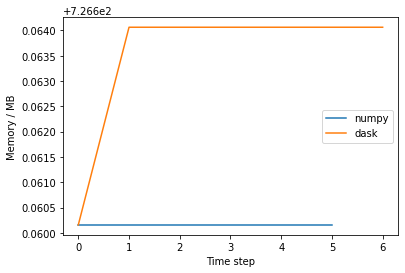

In [ ]:
memory_numpy = memory_usage(sum_with_numpy, interval=0.01)
memory_dask = memory_usage(sum_with_dask, interval=0.01)


# Plot results
plt.plot(memory_numpy, label='numpy')
plt.plot(memory_dask, label='dask')

plt.xlabel('Time step')
plt.ylabel('Memory / MB')
plt.legend()
plt.show()

# Ejercicio 1 Realice el perfilado de memoria  de la función utilizando numba y calcule tiempo de ejecución. 
# Ejercicio #2 Compare los resultados de una función sin y utilizando el modo @jit(nopython=True)


Numba paralela 
Al establecer la opción paralela para jit() se habilita un pase de transformación de Numba que intenta paralelizar automáticamente y realizar otras optimizaciones en (parte de) una función. 

In [75]:

@jit(nopython=True, parallel=True)
def trace_numba_parallel(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += a[i, i] 
    return a + trace  







Ejercicio Compare  el tiempo de ejecucion y perfile de la anterior funcion para arreglo  de 1000x1000

* 2-Numba @jit
* 3-Numba @jit(nopython=True)
* 4-@jit(nopython=True, parallel=True)

In [ ]:
large_x = np.arange(1000000).reshape(1000, 1000)